# **<center>Welcome to our first Kernel</center>**
### <center>Please Vote If you like our Kernel and share your Feedback</center> <img  src="https://raw.githubusercontent.com/ABSphreak/ABSphreak/master/gifs/Hi.gif" width="50px">

# **<h1 align ="middle"><b> Netflix Recommender, Netflix Exploratory Data Analysis </b></h1>**

# 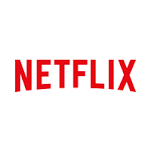

### Netflix, Inc. is an American over-the-top content platform and production company headquartered in Los Gatos, California. Netflix was founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California.

### **The company's primary business is a subscription-based streaming service offering online streaming from a library of films and television series, including those produced in-house.**


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv
/kaggle/input/goodbooks-10k/book_tags.csv
/kaggle/input/goodbooks-10k/ratings.csv
/kaggle/input/goodbooks-10k/books.csv
/kaggle/input/goodbooks-10k/sample_book.xml
/kaggle/input/goodbooks-10k/to_read.csv
/kaggle/input/goodbooks-10k/tags.csv
/kaggle/input/imdb-extensive-dataset/IMDb title_principals.csv
/kaggle/input/imdb-extensive-dataset/IMDb names.csv
/kaggle/input/imdb-extensive-dataset/IMDb movies.csv
/kaggle/input/imdb-extensive-dataset/IMDb ratings.csv


In [3]:
import pandas as pd  #pandas to load datasets
import numpy as np  #numpy for linear algebra
import matplotlib.pyplot as plt  #matplotlib for making plots
import seaborn as sns  #seaborn for making plots

<p>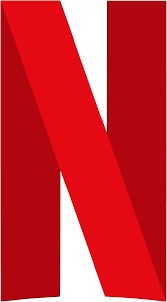</p>

### **<h1 align ="middle"><b> NETFLIX RECOMMENDER SYSTEM </b></h1>**

### **Recommender systems try to automate aspects of a completely different information discovery model where people try to find other people with similar tastes and then ask them to suggest new things.**

In [4]:
netflix_dataset = pd.read_csv("../input/netflix-shows/netflix_titles.csv")
netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [5]:
netflix_dataset.count()

show_id         6234
type            6234
title           6234
director        4265
cast            5664
country         5758
date_added      6223
release_year    6234
rating          6224
duration        6234
listed_in       6234
description     6234
dtype: int64

# **<center>Content-Based Recommendation System</center>**

## <center><u>Content-Based Filtering</u></center>


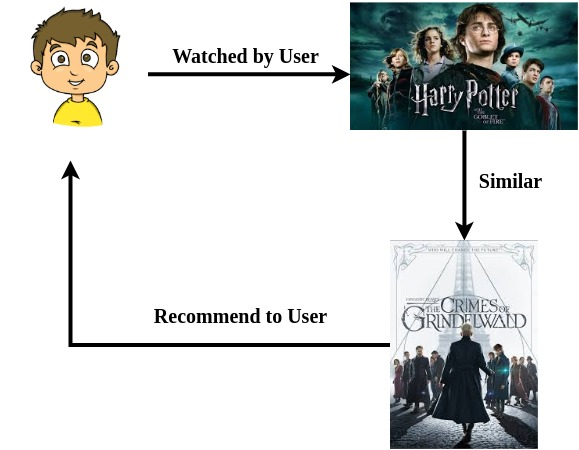

### **A content-based recommender works with data that the user provides, either explicitly (rating) or implicitly (clicking on a link). Based on that data, a user profile is generated, which is then used to make suggestions to the user.**

#### **Filling NaN values with empty String ' '**

In [6]:
fill_netflix_dataset = netflix_dataset.fillna(' ')
fill_netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


### **Term Frequency(TF) and Inverse Document Frequency(IDF)**

**Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:

**TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)**


**Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following:

**IDF(t) = log_e(Total number of documents / Number of documents with term t in it)**

**TF-IDF** is used mainly because, Suppose we search for "the fundamental of DataScience" on Google. It is certain that "the" will occur more frequently than "DataScience" but the relative importance of "DataScience" is higher than "the" search query point of view.


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
#Removing stop words 
tf_idf = TfidfVectorizer(stop_words='english')

#Constructing TF-IDF matrix by transforming and fitting the data
tf_idf_matrix = tf_idf.fit_transform(fill_netflix_dataset['description'])

# shape of tf_idf_matrix
tf_idf_matrix.shape

(6234, 16151)

16151 words describing 6234 movies in the Netflix dataset

### **Cosine Similarity**

Cosine Similarity  is used to calculate numeric value that denotes the similarity between two movies.

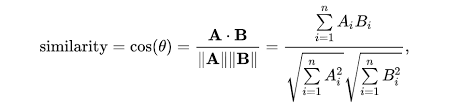


Now, we have used the TF-IDF Vectorizer, calculating the Dot product will diectly give us the Cosine Similarity Score. Therefore, we will use **sklearn's linear_kernel** instead of cosine similarity since it calulate it much faster.


In [9]:
from sklearn.metrics.pairwise import linear_kernel

In [10]:
# calculating the Cosine Similarity Score

cosine_sim_score = linear_kernel(tf_idf_matrix, tf_idf_matrix)

In [11]:
cosine_sim_score[0]

array([1., 0., 0., ..., 0., 0., 0.])

Now, we have a cosine similarity score matrix for all the moies in our Dataset.

In [12]:
netflix_index = netflix_dataset.index
titles = netflix_dataset['title']
indices = pd.Series(netflix_index, index = titles).drop_duplicates()

In [13]:
def get_recommendations(title, cosine_sim = cosine_sim_score):
    
    idx = indices[title]
    
    # Get the pairwise similarity scores of all movies with that movies
    sim_scores = list(enumerate(cosine_sim_score[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    
    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    # Get the Movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the top 10 Similar movies
    return netflix_dataset['title'].iloc[movie_indices]

In [14]:
get_recommendations('Mortel')

3016                  PILI Fantasy: War of Dragons
5688         Edgar Rice Burroughs' Tarzan and Jane
4401                             Figures of Speech
2001                                     FirstBorn
3310    My Entire High School Sinking Into the Sea
5307                                 Psychokinesis
4332                                At First Light
3955                          The Umbrella Academy
1761                                     Chamatkar
5421                              Maharakshak Devi
Name: title, dtype: object

In [15]:
get_recommendations('PK')

2533                    Unbroken
3623       Merku Thodarchi Malai
2738              Jhansi Ki Rani
866     Harishchandrachi Factory
4572                        ROMA
861           Ek Main Aur Ekk Tu
4970     Bhavesh Joshi Superhero
2416       Servant of the People
1514                    Stranger
1700                   Behzat Ç.
Name: title, dtype: object

In [16]:
get_recommendations('Friends')

5659                       BoJack Horseman
5987                              Episodes
20                       Manhattan Romance
3923                             Studio 54
5830                            Dad's Army
5843                     Trailer Park Boys
4381                  Single Ladies Senior
1524                            Warehoused
5445    O-Negative, Love Can’t Be Designed
2594                            Life Story
Name: title, dtype: object

It is seen that the model performs well, but it is not accurate recommendations. 
This is not of much use to most people as we doesn't take into considerations very important features such as cast, title, director and l, which determine the rating and the popularity of a movie. 

Therefore, we going to use much more suggestive features than Tagline or titles.

In next subblocks, we will build a more sophisticated Recommender System that takes title, description, listed_in, cast and director into consideration.

In [17]:
fill_netflix_dataset.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...


In [18]:
def clean_data(x):
    return str.lower(x.replace(' ', ''))

Identifying features on which the model is to be filtered

In [19]:
features = ['title', 'director', 'cast', 'listed_in', 'description']
fill_netflix_dataset = fill_netflix_dataset[features]

In [20]:
for feature in features:
    fill_netflix_dataset[feature] = fill_netflix_dataset[feature].apply(clean_data)
    
fill_netflix_dataset.head(2)

,title,director,cast,listed_in,description
0,normofthenorth:kingsizedadventure,"richardfinn,timmaltby","alanmarriott,andrewtoth,briandobson,colehoward...","children&familymovies,comedies",beforeplanninganawesomeweddingforhisgrandfathe...
1,jandino:whateverittakes,,jandinoasporaat,stand-upcomedy,jandinoasporaatriffsonthechallengesofraisingki...


In [21]:
def create_soup(x):
    return x['title'] + ' ' + x['director'] + ' ' + x['cast'] + ' ' + x['listed_in'] +' ' + x['description']

In [22]:
fill_netflix_dataset['soup'] = fill_netflix_dataset.apply(create_soup, axis = 1)

Now, we are going to create our updated version of Recommender function as same as last one

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(fill_netflix_dataset['soup'])

cosine_sim_score2 = cosine_similarity(count_matrix, count_matrix)

In [24]:
fill_netflix_dataset = fill_netflix_dataset.reset_index()
indices = pd.Series(fill_netflix_dataset.index, index = fill_netflix_dataset['title'])

In [25]:
def updated_recommendations(title, cosine_sim = cosine_sim_score2):
    
    title = title.replace(' ', '').lower()
    idx = indices[title]
    
    # Get the pairwise similarity scores of all movies with that movies
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    
    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    # Get the Movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the top 10 Similar movies
    return netflix_dataset['title'].iloc[movie_indices]

In [26]:
updated_recommendations('PK')

5054                           3 Idiots
5494       The Legend of Michael Mishra
3093                  Anthony Kaun Hai?
2196                             Haapus
691                               Sanju
4110                   Taare Zameen Par
1449                    Chance Pe Dance
2194                    Chal Dhar Pakad
1746    EMI: Liya Hai To Chukana Padega
4920                   Khosla Ka Ghosla
Name: title, dtype: object

In [27]:
updated_recommendations('The Hook Up Plan')

2576                     Melodies of Life - Born This Way
5273                                       Dancing Angels
5708                                        Little Things
2210                                           Rishta.com
5441    Club Friday To Be Continued - My Beautiful Tomboy
1155                                          Oh My Ghost
625                                  Accidentally in Love
789                                       College Romance
2030                                  แผนร้ายนายเจ้าเล่ห์
2480                                    Bangkok Bachelors
Name: title, dtype: object

In [28]:
updated_recommendations('Kiss me first')

233     How to Live Mortgage Free with Sarah Beeny
522                          Terrorism Close Calls
1605                                Killer Ratings
4793                      Inside the Criminal Mind
4813                                 I AM A KILLER
6177                                    Hinterland
1248                                      Paranoid
3776                                          Safe
5815                                      Sherlock
6180                                         Vexed
Name: title, dtype: object

In [29]:
updated_recommendations('Friends')

5987                               Episodes
5980                 The Andy Griffith Show
6225                                Frasier
5699                             Still Game
5639                        Toast of London
5830                             Dad's Army
6094                    Pee-wee's Playhouse
5976                                 Cheers
5981    The Twilight Zone (Original Series)
6179                           The IT Crowd
Name: title, dtype: object

### **<h1 align ="middle"><b> Analysing Datasets through Various PLOTS for Various Information </b></h1>**

### **Which content is more Available on NETFLIX ?** MOVIES or TV-SHOWS

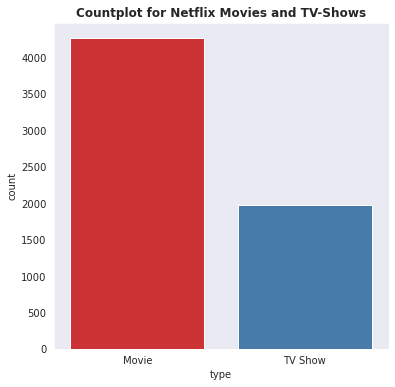

In [30]:
# creating Countplot from Seaborn to show max available content in NETFLIX

sns.set_style('dark')
ax = plt.subplots(figsize = (6, 6))
plt.title('Countplot for Netflix Movies and TV-Shows', fontweight='bold')
ax = sns.countplot(x = 'type', data=netflix_dataset, palette='Set1')

Hence, This plot shows NETFLIX has more **MOVIES** content instead of TV-SHOWS. 

### **Which month is better option to release new Content in 2020 ?** 

This question is mainly based on **distributors focused and there promotion strategy** but at same point this might be also depends on the no of new content added/ release in a month. If there is less no of content added in month then more audience going to watch that content and this increases the chances to success that content.

**Hence, adding new content in a month of less no of new content added/ release will help the content to be more successfull.**

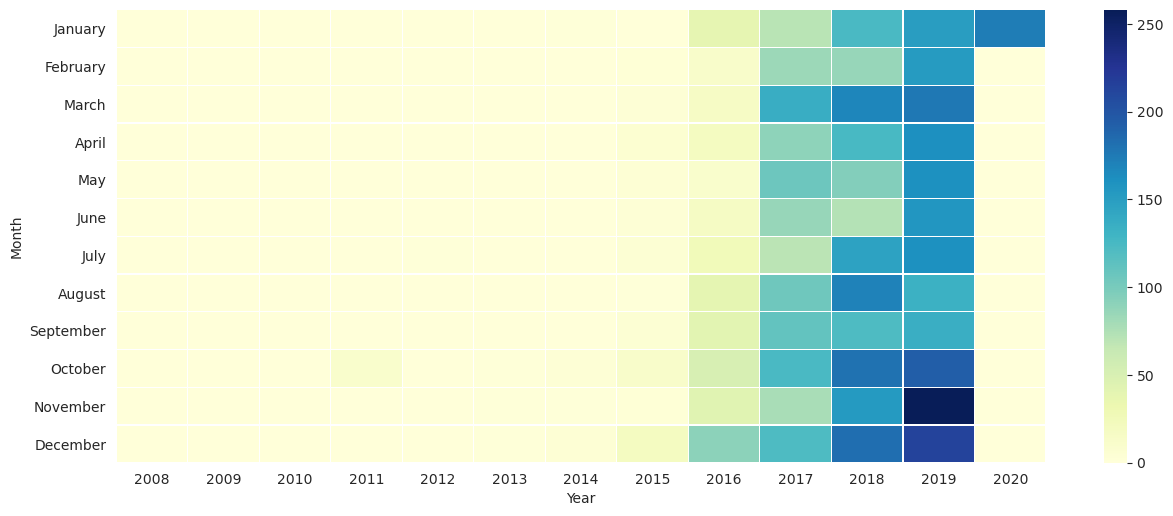

In [31]:
#creating heatmap to analyse least releasing month content

#fetching value of month and year from dataset to plot heatmap

#month is available in 'dateadded' coulumn in dataset (format 'month date, year')
#For fetching month we doing splitting in 'dateadded' column through whole dataset so we take dateadded coloum out from dataset

net_date = netflix_dataset[['date_added']].dropna()

net_date['Year'] = net_date.date_added.apply(lambda y : y.split(' ')[-1])
net_date['Month'] = net_date.date_added.apply(lambda y : y.split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df = net_date.groupby('Year')['Month'].value_counts().unstack().fillna(0)[month_order].T


ax = plt.subplots(figsize = (15, 6), dpi=100)
ax = sns.heatmap(df, cmap="YlGnBu", linewidths=.1)

August and September may be the best time to launch any new content in 2020 in respect to 2019.

### **In which Year Maximum Movies and TV-Shows are released ?** 

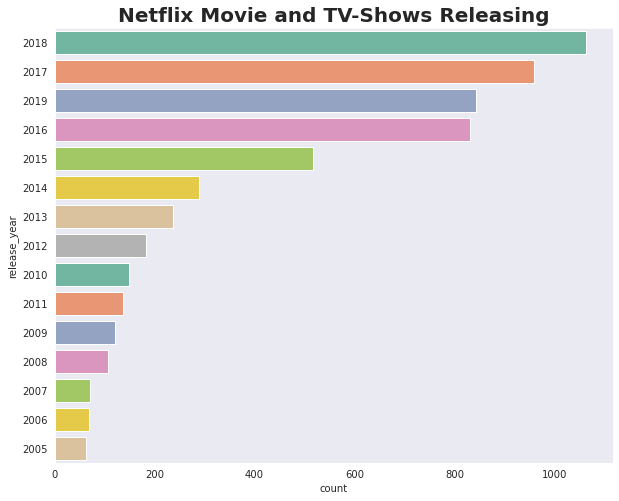

In [32]:
ax = plt.subplots(figsize = (10, 8))
sns.set_style('dark')
plt.title('Netflix Movie and TV-Shows Releasing', fontweight='bold', fontsize=20)
ax = sns.countplot(y = 'release_year', data = netflix_dataset, order = netflix_dataset['release_year'].value_counts().index[0:15], palette='Set2')

This visualization shows that 2018 is the maximum releasing year in Netflix.

### **Dividing Netflix Dataset into two parts Movies and TV-Shows** 

In [33]:
netflix_movies = netflix_dataset[netflix_dataset['type'] == 'Movie']
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


In [34]:
netflix_tvshows = netflix_dataset[netflix_dataset['type'] == 'TV Show']
netflix_tvshows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,NaN,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",NaN,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...


### **Movies and TV-Shows rating Analysis** 

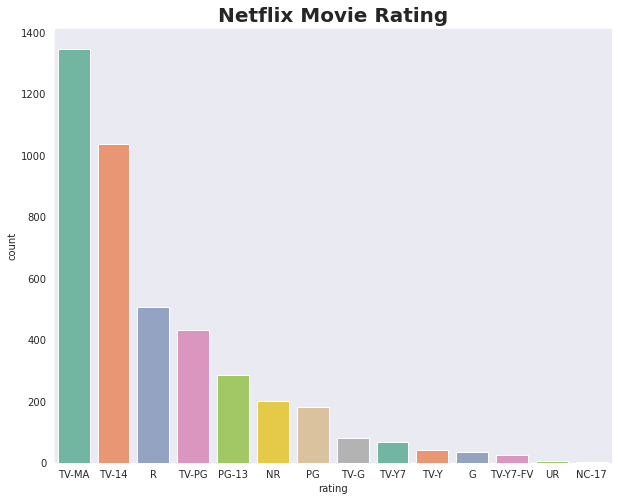

In [35]:
ax = plt.subplots(figsize = (10, 8))
sns.set_style('dark')
plt.title('Netflix Movie Rating', fontweight='bold', fontsize=20)
ax = sns.countplot(x = 'rating', data = netflix_movies, palette = 'Set2', order = netflix_movies['rating'].value_counts().index[0:15])

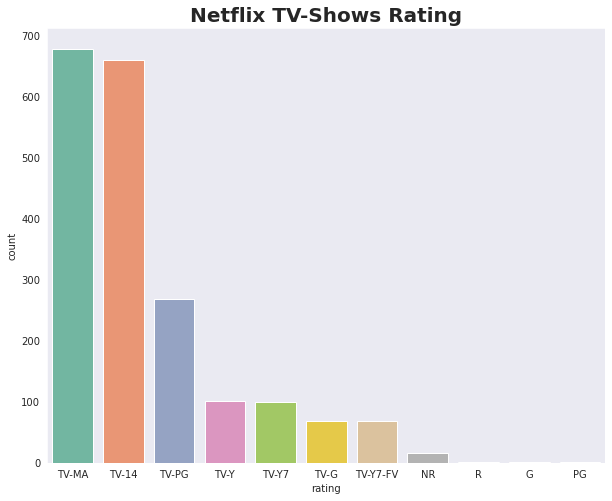

In [36]:
ax = plt.subplots(figsize = (10, 8))
sns.set_style('dark')
plt.title('Netflix TV-Shows Rating', fontweight = 'bold', fontsize=20)
ax = sns.countplot(x = 'rating', data = netflix_tvshows, palette='Set2', order = netflix_tvshows['rating'].value_counts().index[0:15])

Largest Rating in Movies and TV-Shows is of 'TV-MA', according to the TV Parental Guidelines website, means “This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.

### **Movies and TV-Shows content creating Countries** 

In [39]:
# More movies content creating countries

countries = {}
netflix_movies['country'] = netflix_movies['country'].fillna('Unknown')

list_countries = list(netflix_movies['country'])

for i in list_countries:
    i = list(i.split(','))
    
    if len(i) is 1:
        if i in list(countries.keys()):
            countries[i] += 1
        else:
            countries[i[0]] = 1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j] += 1
            else:
                countries[j] = 1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [41]:
final_countries = {}

for country, no in countries.items():
    country = country.replace(' ','')
    
    if country in list(final_countries.keys()):
        final_countries[country] += no
    else:
        final_countries[country] = no
        
final_countries = {k : v for k, v in sorted(final_countries.items(), key = lambda item : item[1], reverse = True)}

Text(0, 0.5, 'Arrival delays (in minutes)')

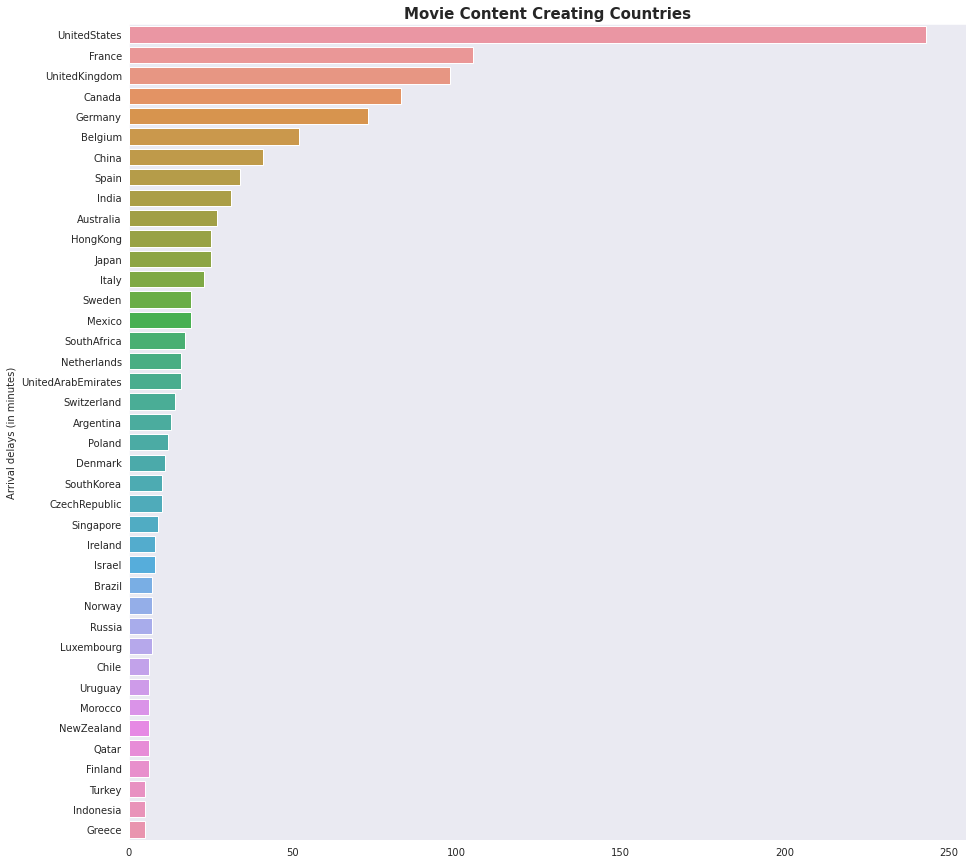

In [52]:
plt.figure(figsize = (15, 15))
plt.title('Movie Content Creating Countries', fontweight = 'bold', fontsize=15)

y_ver = list(final_countries.keys())
x_hor = list(final_countries.values())
sns.barplot( y = y_ver[0:40], x = x_hor[0:40])
plt.ylabel('Arrival delays (in minutes)')


United State is the most Movie conent creating country.

In [53]:
# More TV-Shows content creating countries

countries = {}
netflix_tvshows['country'] = netflix_tvshows['country'].fillna('Unknown')

list_countries = list(netflix_tvshows['country'])

for i in list_countries:
    i = list(i.split(','))
    
    if len(i) is 1:
        if i in list(countries.keys()):
            countries[i] += 1
        else:
            countries[i[0]] = 1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j] += 1
            else:
                countries[j] = 1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [54]:
final_countries = {}

for country, no in countries.items():
    country = country.replace(' ','')
    
    if country in list(final_countries.keys()):
        final_countries[country] += no
    else:
        final_countries[country] = no
        
final_countries = {k : v for k, v in sorted(final_countries.items(), key = lambda item : item[1], reverse = True)}

Text(0, 0.5, 'Arrival delays (in minutes)')

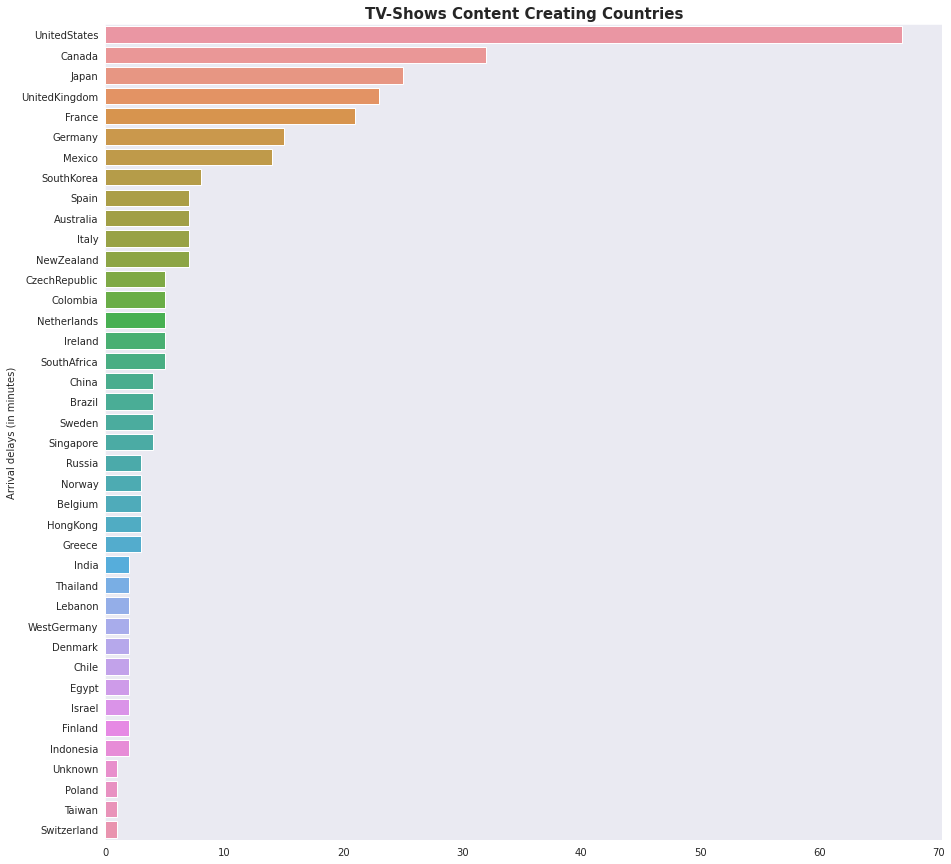

In [55]:
plt.figure(figsize = (15, 15))
plt.title('TV-Shows Content Creating Countries', fontweight = 'bold', fontsize=15)

y_ver = list(final_countries.keys())
x_hor = list(final_countries.values())
sns.barplot( y = y_ver[0:40], x = x_hor[0:40])
plt.ylabel('Arrival delays (in minutes)')

United State is the most TV-Shows conent creating country.

### **Genres WordClouds for Movies and TV-Shows** 

In [57]:
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [70]:
genres = list(netflix_movies['listed_in'])
gen = []

for i in genres:
    i = list(i.split(','))
    
    for j in i:
        gen.append(j.replace(' ',''))

g = Counter(gen)

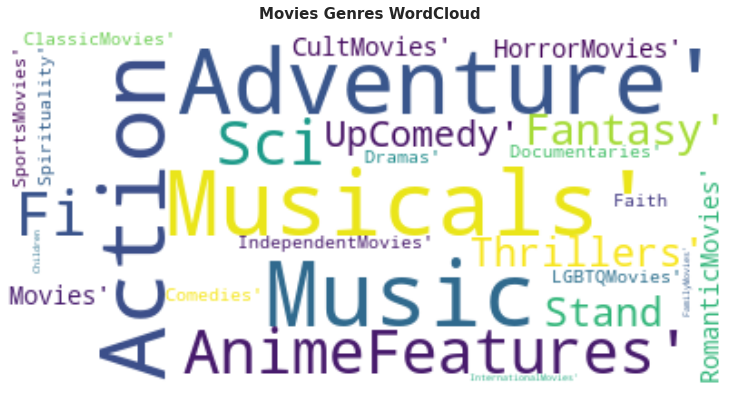

In [71]:
text = list(set(gen))
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(max_font_size = 50, max_words = 100, background_color =  'white').generate(str(text))

plt.title('Movies Genres WordCloud', fontweight = 'bold', fontsize=15)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [72]:
genres = list(netflix_tvshows['listed_in'])
gen = []

for i in genres:
    i = list(i.split(','))
    
    for j in i:
        gen.append(j.replace(' ',''))

g=Counter(gen)

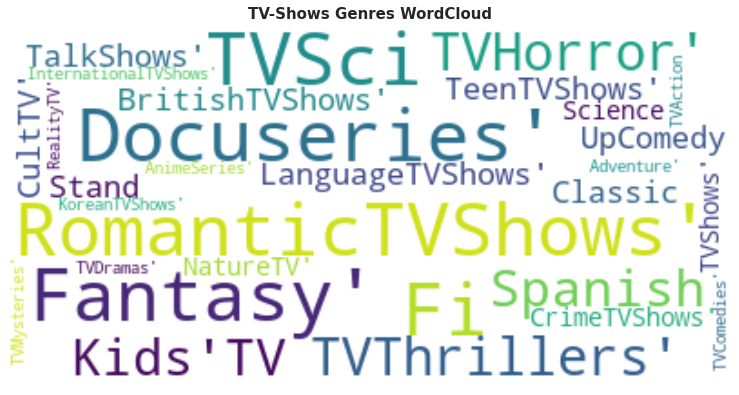

In [74]:
text = list(set(gen))

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(text))
plt.rcParams['figure.figsize'] = (13, 13)

plt.title('TV-Shows Genres WordCloud', fontweight = 'bold', fontsize=15)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

[![forthebadge](https://forthebadge.com/images/badges/built-with-swag.svg)](https://forthebadge.com)